In [48]:
#Importing all the necessary packages
%load_ext autoreload
%autoreload 2

import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import lxml.html as lh
import urllib3
pd.set_option('display.max_rows', None)

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

from scipy import stats

sns.set_style("whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
#For the team roster, the easiest website with the necessary table was only from Wikipedia
#I had to web scrape each team's wiki website
#The only disadvantage with the wikipedia websites were that they didn't provide the player's position
#Therefore, I manually researched each player's position and added it to the table

In [50]:
#Argentina

# get the response in the form of html
wikiurl = "https://en.wikipedia.org/wiki/Argentina_men%27s_national_volleyball_team#Current_squad"
response=requests.get(wikiurl)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table=soup.find('table',{"class":"wikitable sortable"})
df=pd.read_html(str(table))

# convert list to dataframe
df=pd.DataFrame(df[0])

position = ['S','OH','MB','OH','MB','L',"OP",'OH','S','OH','OH','MB','MB','OP']
df['Position'] = position

h=df['Height'].str.slice(stop=4).astype(float)
df.loc[:,'Height2'] = h

s=df['Spike'].str.slice(stop=3).astype(float)
df.loc[:,'Spike2'] = s

b=df['Block'].str.slice(stop=3).astype(float)
df.loc[:,'Block2'] = b

argentina=df[["Name","Position","Height2","Spike2","Block2"]]
argentina = argentina.rename(columns={'Height2': 'Height', 'Spike2': 'Spike','Block2':'Block'})


argentina

,Name,Position,Height,Spike,Block
0,Matias Sanchez,S,1.73,304.0,282.0
1,Jan Martinez Franchi,OH,1.90,330.0,310.0
2,Joaquin Gallego,MB,2.04,343.0,323.0
3,Facundo Conte,OH,1.97,354.0,334.0
4,Agustín Loser,MB,1.93,335.0,310.0
5,Santiago Danani,L,1.76,324.0,309.0
6,Bruno Lima,OP,1.98,341.0,320.0
7,Ezequiel Palacios,OH,1.98,352.0,330.0
8,Luciano De Cecco (C),S,1.91,332.0,315.0
9,Luciano Palonsky,OH,1.98,355.0,328.0


In [51]:
#Australia

# get the response in the form of html
wikiurl = "https://en.wikipedia.org/wiki/Australia_men%27s_national_volleyball_team#Current_roster"
response=requests.get(wikiurl)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table=soup.find('table',{"class":"wikitable sortable"})
df=pd.read_html(str(table))

# convert list to dataframe
df=pd.DataFrame(df[0])

position = ['S','OP','MB','MB','OH','L',"MB",'OP','S','OH','OH','OH','OP','OH','L']
df['Position'] = position

h=df['Height'].str.slice(stop=4).astype(float)
df.loc[:,'Height2'] = h

s=df['Spike'].str.slice(stop=3).astype(float)
df.loc[:,'Spike2'] = s

b=df['Block'].str.slice(stop=3).astype(float)
df.loc[:,'Block2'] = b

australia=df[["Name","Position","Height2","Spike2","Block2"]]
australia = australia.rename(columns={'Height2': 'Height', 'Spike2': 'Spike','Block2':'Block'})


australia

,Name,Position,Height,Spike,Block
0,Arshdeep Dosanjh,S,2.05,358.0,340.0
1,Tom Edgar,OP,2.12,365.0,345.0
2,James Weir,MB,2.04,355.0,342.0
3,Trent O'Dea,MB,2.01,354.0,344.0
4,Max Staples,OH,1.94,358.0,345.0
5,Luke Perry,L,1.80,331.0,315.0
6,Nehemiah Mote (C),MB,2.04,367.0,354.0
7,Thomas Hodges,OP,1.97,350.0,338.0
8,Nicholas Butler,S,1.98,345.0,333.0
9,Curtis Stockton,OH,1.98,354.0,334.0


In [52]:
#Brazil

# get the response in the form of html
wikiurl = "https://en.wikipedia.org/wiki/Brazil_men%27s_national_volleyball_team#Current_squad"
response=requests.get(wikiurl)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table=soup.find('table',{"style":"font-size:100%; text-align:center;"})
df=pd.read_html(str(table))

# convert list to dataframe
df=pd.DataFrame(df[0])

position = ['S','OH','OP','OH','OH','S',"L",'MB','L','OH','MB','OP','MB','OP']
df['Position'] = position

h=df['Height'].str.slice(stop=4).astype(float)
df.loc[:,'Height2'] = h

s=df['Spike'].str.slice(stop=3).astype(float)
df.loc[:,'Spike2'] = s

b=df['Block'].str.slice(stop=3).astype(float)
df.loc[:,'Block2'] = b

brazil=df[["Name","Position","Height2","Spike2","Block2"]]
brazil = brazil.rename(columns={'Height2': 'Height', 'Spike2': 'Spike','Block2':'Block'})

brazil

,Name,Position,Height,Spike,Block
0,Bruno Rezende (c),S,1.90,323.0,302.0
1,Adriano Cavalcante,OH,2.01,344.0,324.0
2,Wallace de Souza,OP,1.98,365.0,348.0
3,Yoandy Leal,OH,2.02,371.0,348.0
4,Rodrigo Leão,OH,1.97,331.0,316.0
5,Fernando Kreling,S,1.85,319.0,301.0
6,Maique Nascimento,L,1.82,310.0,255.0
7,Lucas Saatkamp,MB,2.09,340.0,321.0
8,Thales Hoss,L,1.90,320.0,303.0
9,Ricardo Lucarelli Souza,OH,1.96,355.0,340.0


In [53]:
#Bulgaria (positions already provided)

# get the response in the form of html
wikiurl = "https://en.wikipedia.org/wiki/Bulgaria_men%27s_national_volleyball_team#Current_squad"
response=requests.get(wikiurl)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table=soup.find('table',{"class":"wikitable sortable"})
df=pd.read_html(str(table))

# convert list to dataframe
df=pd.DataFrame(df[0])

h=df['Height'].str.slice(stop=4).astype(float)
df.loc[:,'Height2'] = h

s=df['Spike'].str.slice(stop=3).astype(float)
df.loc[:,'Spike2'] = s

b=df['Block'].str.slice(stop=3).astype(float)
df.loc[:,'Block2'] = b

bulgaria=df[["Name","Position","Height2","Spike2","Block2"]]
bulgaria = bulgaria.rename(columns={'Height2': 'Height', 'Spike2': 'Spike','Block2':'Block'})

bulgaria

,Name,Position,Height,Spike,Block
0,Denis Karyagin,OH,2.06,355.0,340.0
1,Stefan Chavdarov,MB,2.02,348.0,335.0
2,Nikolay Kolev,MB,2.04,355.0,340.0
3,Martin Atanasov,OH,1.98,358.0,335.0
4,Svetoslav Gotsev,MB,2.05,358.0,335.0
5,Dobromir Dimitrov,S,1.98,345.0,335.0
6,Todor Skrimov,OH,1.91,348.0,330.0
7,Georgi Seganov,S,1.98,340.0,325.0
8,Aleks Grozdanov,MB,2.08,357.0,334.0
9,Asparuh Asparuhov,OH,2.01,353.0,335.0


In [54]:
#Canada

# get the response in the form of html
wikiurl = "https://en.wikipedia.org/wiki/Canada_men%27s_national_volleyball_team#Team"
response=requests.get(wikiurl)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table=soup.find('table',{"class":"wikitable sortable"})
df=pd.read_html(str(table))

# convert list to dataframe
df=pd.DataFrame(df[0])

position = ['S','OH','OH','OH','S','OP','MB','MB','OH','OH','MB','MB','OH','S']
df['Position'] = position

h=df['Height'].str.slice(stop=4).astype(float)
df.loc[:,'Height2'] = h

s=df['Spike'].str.slice(stop=3).astype(float)
df.loc[:,'Spike2'] = s

b=df['Block'].str.slice(stop=3).astype(float)
df.loc[:,'Block2'] = b

canada=df[["Name","Position","Height2","Spike2","Block2"]]
canada = canada.rename(columns={'Height2': 'Height', 'Spike2': 'Spike','Block2':'Block'})

canada

,Name,Position,Height,Spike,Block
0,Derek Epp,S,2.01,345.0,320.0
1,Nicholas Hoag (C),OH,2.00,350.0,323.0
2,Eric Loeppky,OH,1.97,355.0,325.0
3,Stephen Maar,OH,2.02,358.0,329.0
4,Brett Walsh,S,1.96,347.0,315.0
5,Ryan Sclater,OP,2.00,353.0,320.0
6,Pearson Eshenko,MB,2.04,363.0,340.0
7,Lucas Van Berkel,MB,2.10,350.0,326.0
8,Ryley Barnes,OH,2.00,352.0,325.0
9,Brodie Hofer,OH,2.00,358.0,330.0


In [55]:
#CHINAAAA (positions already provided)

# get the response in the form of html
wikiurl = "https://en.wikipedia.org/wiki/China_men%27s_national_volleyball_team#Current_squad"
response=requests.get(wikiurl)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table=soup.find('table',{"class":"wikitable sortable"})
df=pd.read_html(str(table))

# convert list to dataframe
df=pd.DataFrame(df[0])

#Player Yang Tianyugan doesn't have a spike nor block height. Googled it!
df['Spike']=df['Spike'].str.replace('–','330 cm') #https://profiles.worldofvolley.com/wov-community/players/157356/tianyuan-yang.html
df['Block']=df['Block'].str.replace('–','320 cm') #https://profiles.worldofvolley.com/wov-community/players/157356/tianyuan-yang.html


h=df['Height'].str.slice(stop=4).astype(float)
df.loc[:,'Height2'] = h

s=df['Spike'].str.slice(stop=3).astype(float)
df.loc[:,'Spike2'] = s

b=df['Block'].str.slice(stop=3).astype(float)
df.loc[:,'Block2'] = b

china=df[["Name","Pos.","Height2","Spike2","Block2"]]
china = china.rename(columns={'Pos.':'Position','Height2': 'Height', 'Spike2': 'Spike','Block2':'Block'})

china

,Name,Position,Height,Spike,Block
0,Yu Yaochen [zh] (c),S,1.95,347.0,338.0
1,Dai Qingyao,OP,2.08,350.0,340.0
2,Yang Yiming,L,1.86,310.0,320.0
3,Zhang Binglong,OH,1.97,355.0,345.0
4,Yu Yuantai,OH,1.83,320.0,310.0
5,Yang Tianyuan,L,1.80,330.0,320.0
6,Li Yongzhen,MB,2.00,345.0,340.0
7,Liu Meng,S,1.95,340.0,330.0
8,Zhang Zhejia,MB,2.07,365.0,355.0
9,Peng Shikun,MB,2.08,340.0,330.0


In [56]:
#France

# get the response in the form of html
wikiurl = "https://en.wikipedia.org/wiki/France_men%27s_national_volleyball_team#Current_squad"
response=requests.get(wikiurl)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table=soup.find('table',{"class":"wikitable sortable"})
df=pd.read_html(str(table))

# convert list to dataframe
df=pd.DataFrame(df[0])

position = ['MB','L','OP','S','OH','OH','S','OP','MB','MB','OH','OH','L','MB']
df['Position'] = position

h=df['Height'].str.slice(stop=4).astype(float)
df.loc[:,'Height2'] = h

s=df['Spike'].str.slice(stop=3).astype(float)
df.loc[:,'Spike2'] = s

b=df['Block'].str.slice(stop=3).astype(float)
df.loc[:,'Block2'] = b

france=df[["Name","Position","Height2","Spike2","Block2"]]
france = france.rename(columns={'Height2': 'Height', 'Spike2': 'Spike','Block2':'Block'})

france

,Name,Position,Height,Spike,Block
0,Barthélémy Chinenyeze,MB,2.04,365.0,335.0
1,Jenia Grebennikov,L,1.88,345.0,330.0
2,Jean Patry,OP,2.07,357.0,334.0
3,Benjamin Toniutti (C),S,1.83,320.0,300.0
4,Kévin Tillie,OH,2.00,345.0,325.0
5,Earvin N'Gapeth,OH,1.94,358.0,327.0
6,Antoine Brizard,S,1.96,340.0,310.0
7,Stéphen Boyer,OP,1.96,355.0,334.0
8,Nicolas Le Goff,MB,2.06,365.0,345.0
9,Médéric Henry,MB,2.12,345.0,327.0


In [57]:
#Germany

# get the response in the form of html
wikiurl = "https://en.wikipedia.org/wiki/Germany_men%27s_national_volleyball_team"
response=requests.get(wikiurl)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table=soup.find('table',{"class":"wikitable sortable"})
df=pd.read_html(str(table))

# convert list to dataframe
df=pd.DataFrame(df[0])

position = ['OH','OH','OH','OH','L','S','OH','S','MB','OP','MB','OH','OP','MB']
df['Position'] = position

h=df['Height'].str.slice(stop=4).astype(float)
df.loc[:,'Height2'] = h

s=df['Spike'].str.slice(stop=3).astype(float)
df.loc[:,'Spike2'] = s

b=df['Block'].str.slice(stop=3).astype(float)
df.loc[:,'Block2'] = b

germany=df[["Name","Position","Height2","Spike2","Block2"]]
germany = germany.rename(columns={'Height2': 'Height', 'Spike2': 'Spike','Block2':'Block'})

germany

,Name,Position,Height,Spike,Block
0,Christian Fromm,OH,2.04,345.0,324.0
1,Ruben Schott,OH,1.93,326.0,309.0
2,Moritz Reichert,OH,1.94,336.0,314.0
3,David Sossenheimer,OH,1.93,354.0,340.0
4,Julian Zenger,L,1.90,330.0,315.0
5,Lukas Kampa (C),S,1.96,335.0,320.0
6,Moritz Karlitzek,OH,1.91,335.0,310.0
7,Jan Zimmermann,S,1.91,340.0,312.0
8,Florian Krage,MB,2.03,343.0,331.0
9,Linus Weber,OP,1.99,336.0,321.0


In [58]:
#Iran

# get the response in the form of html
wikiurl = "https://en.wikipedia.org/wiki/Iran_men%27s_national_volleyball_team"
response=requests.get(wikiurl)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table=soup.find('table',{"class":"wikitable sortable"})
df=pd.read_html(str(table))

# convert list to dataframe
df=pd.DataFrame(df[0])

position = ['MB','OH','MB','OH','L','L','OP','OH','OH','MB','OP','S','S','OH']
df['Position'] = position

h=df['Height'].str.slice(stop=4).astype(float)
df.loc[:,'Height2'] = h

s=df['Spike'].str.slice(stop=3).astype(float)
df.loc[:,'Spike2'] = s

b=df['Block'].str.slice(stop=3).astype(float)
df.loc[:,'Block2'] = b

iran=df[["Name","Position","Height2","Spike2","Block2"]]
iran = iran.rename(columns={'Height2': 'Height', 'Spike2': 'Spike','Block2':'Block'})



iran['Name'] = iran['Name'].replace(['Milad Ebadipour (.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}C)'], 
                                    'Milad Ebadipour') #For some reason, this player when scraping was weird, so I replaced it

iran

,Name,Position,Height,Spike,Block
0,Mahdi Jelveh,MB,2.01,360.0,345.0
1,Milad Ebadipour,OH,1.96,358.0,340.0
2,Amir Hossein Toukhteh,MB,2.03,373.0,354.0
3,Shahrooz Homayonfarmanesh,OH,1.92,325.0,320.0
4,Mohammad Reza Hazratpour,L,1.80,300.0,290.0
5,Mohammad Reza Moazzen,L,1.75,292.0,281.0
6,Saber Kazemi,OP,2.03,360.0,347.0
7,Amir Hossein Esfandiar,OH,2.06,355.0,348.0
8,Mohammadjavad Manavinezhad,OH,1.98,340.0,320.0
9,Aliasghar Mojarad,MB,2.03,330.0,310.0


In [59]:
#Italy

# get the response in the form of html
wikiurl = "https://en.wikipedia.org/wiki/Italy_men%27s_national_volleyball_team#Current_roster"
response=requests.get(wikiurl)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table=soup.find('table',{"style":"font-size:100%; text-align:center;"})
df=pd.read_html(str(table))

# convert list to dataframe
df=pd.DataFrame(df[0])

position = ['OP','OH','OH','S','L','S',"OH",'MB','OH','OP','MB','MB','L','MB']
df['Position'] = position

h=df['Height'].str.slice(stop=4).astype(float)
df.loc[:,'Height2'] = h

s=df['Spike'].str.slice(stop=3).astype(float)
df.loc[:,'Spike2'] = s

b=df['Block'].str.slice(stop=3).astype(float)
df.loc[:,'Block2'] = b

italy=df[["Name","Position","Height2","Spike2","Block2"]]
italy = italy.rename(columns={'Height2': 'Height', 'Spike2': 'Spike','Block2':'Block'})

italy

,Name,Position,Height,Spike,Block
0,Giulio Pinali,OP,1.99,349.0,338.0
1,Francesco Recine,OH,1.86,325.0,300.0
2,Alessandro Michieletto,OH,2.05,357.0,321.0
3,Simone Giannelli (C),S,2.00,350.0,330.0
4,Fabio Balaso,L,1.78,305.0,280.0
5,Riccardo Sbertoli,S,1.88,326.0,246.0
6,Mattia Bottolo,OH,1.96,340.0,319.0
7,Gianluca Galassi,MB,2.01,350.0,325.0
8,Daniele Lavia,OH,2.00,345.0,315.0
9,Yuri Romanò,OP,2.01,350.0,343.0


In [60]:
#Japan (position already provided)

# get the response in the form of html
wikiurl = "https://en.wikipedia.org/wiki/Japan_men%27s_national_volleyball_team#Current_squad"
response=requests.get(wikiurl)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table=soup.find('table',{"class":"wikitable sortable"})
df=pd.read_html(str(table))

# convert list to dataframe
df=pd.DataFrame(df[0])


h=df['Height'].str.slice(stop=4).astype(float)
df.loc[:,'Height2'] = h

s=df['Spike'].str.slice(stop=3).astype(float)
df.loc[:,'Spike2'] = s

b=df['Block'].str.slice(stop=3).astype(float)
df.loc[:,'Block2'] = b

japan=df[["Name","Position","Height2","Spike2","Block2"]]
japan = japan.rename(columns={'Height2': 'Height', 'Spike2': 'Spike','Block2':'Block'})

japan

,Name,Position,Height,Spike,Block
0,Yuji Nishida,OP,1.87,350.0,335.0
1,Taishi Onodera,MB,2.00,343.0,330.0
2,Tatsunori Otsuka,OH,1.94,340.0,325.0
3,Akihiro Yamauchi,MB,2.04,354.0,335.0
4,Kenta Takanashi,OH,1.90,347.0,330.0
5,Masahiro Sekita,S,1.75,324.0,305.0
6,Masaki Oya,S,1.78,330.0,315.0
7,Ran Takahashi,OH,1.88,343.0,315.0
8,Tomohiro Ogawa,L,1.76,312.0,290.0
9,Yūki Ishikawa (c),OH,1.92,351.0,327.0


In [61]:
#Netherlands

# get the response in the form of html
wikiurl = "https://en.wikipedia.org/wiki/Netherlands_men%27s_national_volleyball_team#Current_squad"
response=requests.get(wikiurl)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table=soup.find('table',{"class":"wikitable sortable"})
df=pd.read_html(str(table))

# convert list to dataframe
df=pd.DataFrame(df[0])

position = ['S','OH','OH','MB','OH','MB','OH','L','OP','OP','MB','OH','S','MB']
df['Position'] = position

h=df['Height'].str.slice(stop=4).astype(float)
df.loc[:,'Height2'] = h

s=df['Spike'].str.slice(stop=3).astype(float)
df.loc[:,'Spike2'] = s

b=df['Block'].str.slice(stop=3).astype(float)
df.loc[:,'Block2'] = b

netherlands=df[["Name","Position","Height2","Spike2","Block2"]]
netherlands = netherlands.rename(columns={'Height2': 'Height', 'Spike2': 'Spike','Block2':'Block'})

netherlands

,Name,Position,Height,Spike,Block
0,Wessel Keemink,S,1.97,337.0,326.0
1,Maarten van Garderen,OH,2.00,359.0,338.0
2,Thijs ter Horst,OH,2.04,364.0,344.0
3,Luuc Van Der Ent,MB,2.08,359.0,351.0
4,Gijs Jorna,OH,1.96,340.0,310.0
5,Fabian Plak,MB,1.98,357.0,341.0
6,Bennie Tuinstra,OH,2.00,350.0,335.0
7,Mats Bleeker,L,1.80,320.0,315.0
8,Nimir Abdel-Aziz (C),OP,2.01,365.0,350.0
9,Wouter ter Maat,OP,2.00,351.0,338.0


In [62]:
#Poland

# get the response in the form of html
wikiurl = "https://en.wikipedia.org/wiki/Poland_men%27s_national_volleyball_team#Current_squad"
response=requests.get(wikiurl)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table=soup.find('table',{"class":"wikitable sortable"})
df=pd.read_html(str(table))

# convert list to dataframe
df=pd.DataFrame(df[0])


df=df.drop(df.index[0])
df=df.drop(df.index[7])
df

position = ['OP','OP','MB','S','OH','MB','OH','OH','S','MB','OH','MB']
df['Position'] = position

h=df['Height'].str.slice(stop=4).astype(float)
df.loc[:,'Height2'] = h

s=df['Spike'].str.slice(stop=3).astype(float)
df.loc[:,'Spike2'] = s

b=df['Block'].str.slice(stop=3).astype(float)
df.loc[:,'Block2'] = b

poland=df[["Name","Position","Height2","Spike2","Block2"]]
poland = poland.rename(columns={'Height2': 'Height', 'Spike2': 'Spike','Block2':'Block'})

poland

,Name,Position,Height,Spike,Block
1,Łukasz Kaczmarek,OP,2.04,345.0,332.0
2,Bartosz Kurek,OP,2.05,370.0,340.0
3,Karol Kłos,MB,2.01,355.0,340.0
4,Grzegorz Łomacz,S,1.87,336.0,309.0
5,Aleksander Śliwka,OH,1.98,342.0,325.0
6,Jakub Kochanowski,MB,1.99,360.0,335.0
7,Kamil Semeniuk,OH,1.94,352.0,326.0
9,Bartosz Kwolek,OH,1.93,343.0,320.0
10,Marcin Janusz,S,1.91,335.0,315.0
11,Mateusz Bieniek,MB,2.10,360.0,330.0


In [63]:
#Serbia

# get the response in the form of html
wikiurl = "https://en.wikipedia.org/wiki/Serbia_men%27s_national_volleyball_team#Current_squad"
response=requests.get(wikiurl)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table=soup.find('table',{"style":"font-size:100%; text-align:center;"})
df=pd.read_html(str(table))

# convert list to dataframe
df=pd.DataFrame(df[0])

position = ['OH','OH','OH','L','MB','OH',"S",'OH','OP','MB','MB','MB','S','OP']
df['Position'] = position

h=df['Height'].str.slice(stop=4).astype(float)
df.loc[:,'Height2'] = h

s=df['Spike'].str.slice(stop=3).astype(float)
df.loc[:,'Spike2'] = s

b=df['Block'].str.slice(stop=3).astype(float)
df.loc[:,'Block2'] = b

serbia=df[["Name","Position","Height2","Spike2","Block2"]]
serbia = serbia.rename(columns={'Height2': 'Height', 'Spike2': 'Spike','Block2':'Block'})

serbia

,Name,Position,Height,Spike,Block
0,Uroš Kovačević,OH,1.97,355.0,338.0
1,Nemanja Petrić,OH,2.02,333.0,320.0
2,Milan Katić,OH,2.02,350.0,325.0
3,Nikola Peković,L,1.76,305.0,300.0
4,Petar Krsmanović,MB,2.05,354.0,349.0
5,Marko Ivović,OH,1.94,365.0,330.0
6,Nikola Jovović,S,1.97,335.0,315.0
7,Pavle Perić,OH,2.07,355.0,335.0
8,Aleksandar Atanasijević,OP,2.02,360.0,338.0
9,Nemanja Mašulović,MB,2.08,350.0,340.0


In [64]:
#Slovenia

# get the response in the form of html
wikiurl = "https://en.wikipedia.org/wiki/Slovenia_men%27s_national_volleyball_team#Current_squad"
response=requests.get(wikiurl)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table=soup.find('table',{"class":"wikitable sortable"})
df=pd.read_html(str(table))

# convert list to dataframe
df=pd.DataFrame(df[0])

position = ['OP','MB','MB','OP','S','MB','MB','OP','L','OH','S','OH','OH','OH']
df['Position'] = position

h=df['Height'].str.slice(stop=4).astype(float)
df.loc[:,'Height2'] = h

s=df['Spike'].str.slice(stop=3).astype(float)
df.loc[:,'Spike2'] = s

b=df['Block'].str.slice(stop=3).astype(float)
df.loc[:,'Block2'] = b

slovenia=df[["Name","Position","Height2","Spike2","Block2"]]
slovenia = slovenia.rename(columns={'Height2': 'Height', 'Spike2': 'Spike','Block2':'Block'})

slovenia

,Name,Position,Height,Spike,Block
0,Tonček Štern,OP,1.98,352.0,340.0
1,Alen Pajenk,MB,2.03,366.0,336.0
2,Jan Kozamernik,MB,2.04,360.0,340.0
3,Mitja Gasparini,OP,2.02,346.0,333.0
4,Dejan Vinčić,S,2.00,354.0,338.0
5,Sašo Štalekar,MB,2.14,354.0,340.0
6,Danijel Koncilja,MB,2.01,352.0,341.0
7,Jan Klobučar,OP,1.96,354.0,345.0
8,Jani Kovačič,L,1.86,320.0,305.0
9,Žiga Štern,OH,1.93,346.0,330.0


In [65]:
#USA

# get the response in the form of html
wikiurl = "https://en.wikipedia.org/wiki/United_States_men%27s_national_volleyball_team#2022_World_Championship"
response=requests.get(wikiurl)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table=soup.find('table',{"class":"wikitable sortable"})
df=pd.read_html(str(table))

# convert list to dataframe
df=pd.DataFrame(df[0])

position = ['OP','OH','MB','OP','OH','S','OP','S','OH','MB','MB','L','L','OH']
df['Position'] = position

h=df['Height'].str.slice(stop=4).astype(float)
df.loc[:,'Height2'] = h

s=df['Spike'].str.slice(stop=3).astype(float)
df.loc[:,'Spike2'] = s

b=df['Block'].str.slice(stop=3).astype(float)
df.loc[:,'Block2'] = b

usa=df[["Name","Position","Height2","Spike2","Block2"]]
usa = usa.rename(columns={'Height2': 'Height', 'Spike2': 'Spike','Block2':'Block'})

usa

,Name,Position,Height,Spike,Block
0,Matt Anderson,OP,2.02,360.0,332.0
1,Aaron Russell,OH,2.05,356.0,337.0
2,Jeffrey Jendryk,MB,2.08,353.0,345.0
3,Kyle Ensing,OP,2.01,366.0,353.0
4,Torey DeFalco,OH,1.98,340.0,328.0
5,Micah Christenson,S,1.98,349.0,340.0
6,Kyle Russell,OP,2.06,358.0,343.0
7,Joshua Tuaniga,S,1.91,320.0,307.0
8,Garrett Muagututia,OH,2.05,359.0,345.0
9,Taylor Averill,MB,2.01,370.0,330.0


In [66]:
#Here, I bring all the players from all the teams, into one table, with their position, height, spike and block heights

frames = [argentina, australia, brazil, bulgaria, canada,china, france,germany,iran, italy,japan,netherlands,poland,serbia,
         slovenia,usa]

result = pd.concat(frames)
result=result.rename(columns={'Name': 'Player'})
result.Player=result.Player.str.title() #To only capitalize the first character of each string
result

result['Player'] = result['Player'].astype(str)
result

df2=result
len(df2) #223 players, in total
df2


,Player,Position,Height,Spike,Block
0,Matias Sanchez,S,1.73,304.0,282.0
1,Jan Martinez Franchi,OH,1.90,330.0,310.0
2,Joaquin Gallego,MB,2.04,343.0,323.0
3,Facundo Conte,OH,1.97,354.0,334.0
4,Agustín Loser,MB,1.93,335.0,310.0
5,Santiago Danani,L,1.76,324.0,309.0
6,Bruno Lima,OP,1.98,341.0,320.0
7,Ezequiel Palacios,OH,1.98,352.0,330.0
8,Luciano De Cecco (C),S,1.91,332.0,315.0
9,Luciano Palonsky,OH,1.98,355.0,328.0


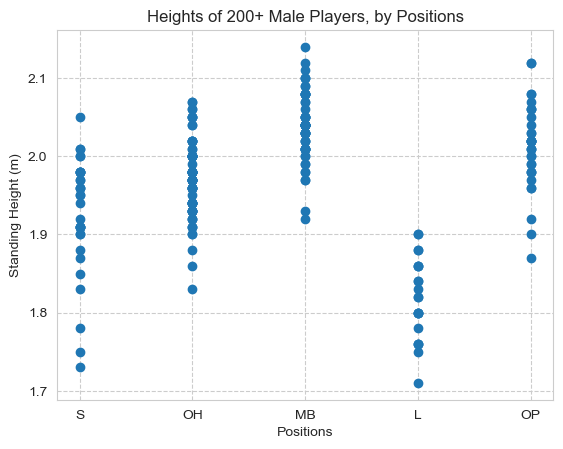

In [67]:
#Doing a scatter plot of the men's height, in relation to their position

plt.scatter(df2.Position,df2.Height)
plt.title("Heights of 200+ Male Players, by Positions")
plt.xlabel("Positions")
plt.ylabel("Standing Height (m)")
plt.grid(linestyle = '--')


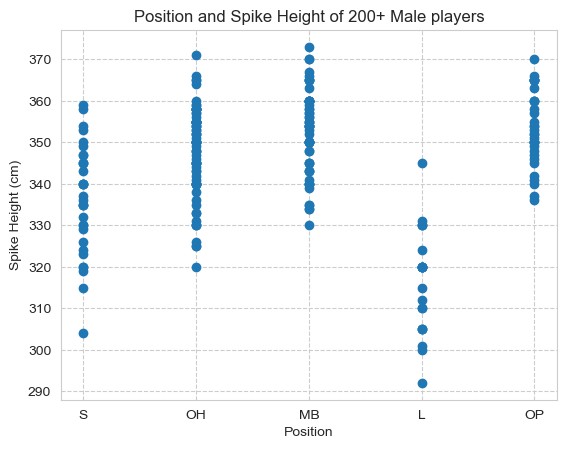

In [68]:
#Doing a scatter plot of the men's spike height, in relation to their position

plt.scatter(df2.Position,df2.Spike)
plt.ylabel("Spike Height (cm)")
plt.xlabel("Position")
plt.title("Position and Spike Height of 200+ Male players")


plt.grid(linestyle = '--')


Text(0.5, 1.0, 'Relation between Height and Spike Height of 200+ Male Players')

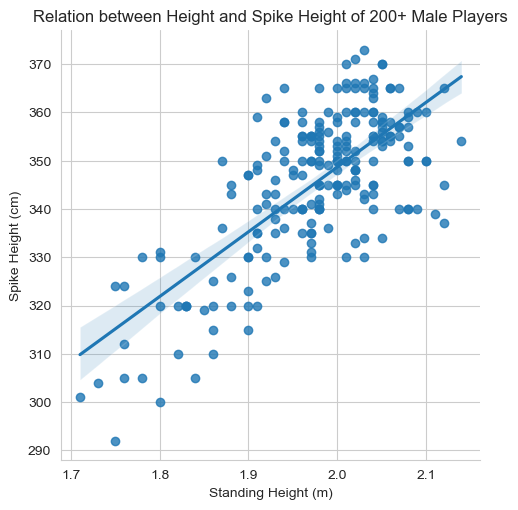

In [69]:
#Doing a linear regression plot between a player's height and their spike height

sns.lmplot(x='Height',y='Spike',data=df2,fit_reg=True) 
plt.xlabel("Standing Height (m)")
plt.ylabel("Spike Height (cm)")
plt.title("Relation between Height and Spike Height of 200+ Male Players")

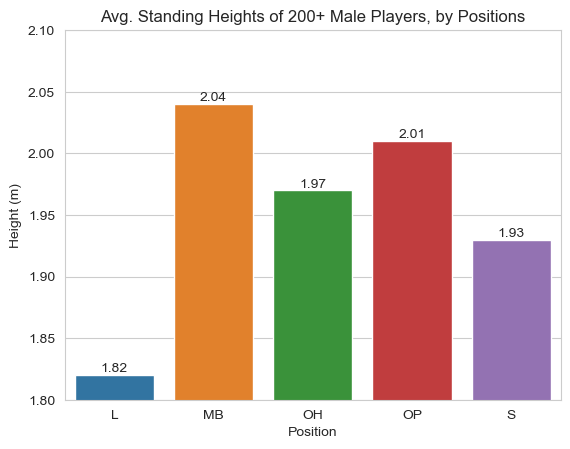

In [70]:
#Producing a histogram for a player's height and their position, on average

r = round(df2.groupby('Position').mean(),2).reset_index()
ax = sns.barplot(x='Position', y='Height',data=r,errwidth=0)
ax.bar_label(ax.containers[0])
plt.ylim(1.8,2.1)

plt.title("Avg. Standing Heights of 200+ Male Players, by Positions")
plt.ylabel("Height (m)")
plt.show()

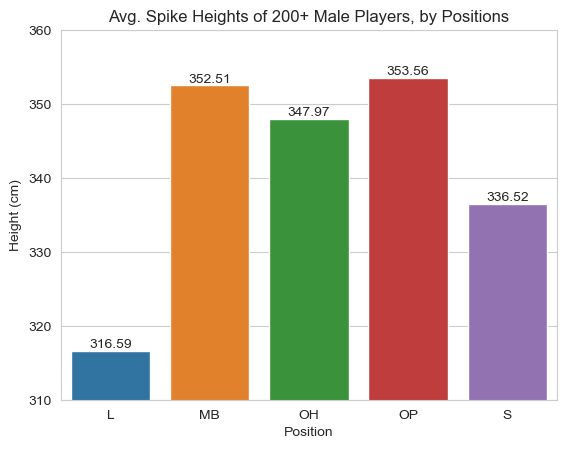

In [71]:
#Producing a histogram for a player's spike height and their position, on average

ax = sns.barplot(x='Position', y='Spike',data=r,errwidth=0)
ax.bar_label(ax.containers[0])
plt.ylim(310,360)

plt.title("Avg. Spike Heights of 200+ Male Players, by Positions")
plt.ylabel("Height (cm)")
plt.show()

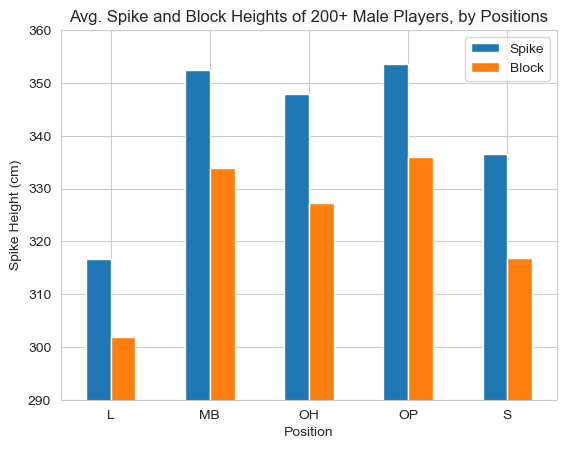

In [72]:
#Doing a comparison between the spike and block heights of a player's position, on average

del r["Height"]
r.plot.bar(x='Position', rot=0)
plt.ylim(290,360)
plt.title("Avg. Spike and Block Heights of 200+ Male Players, by Positions")
plt.ylabel("Spike Height (cm)")
plt.show()

In [73]:
#Below, I'll be scraping the attacking stats from the FIVB werbsite
#https://en.volleyballworld.com/volleyball/competitions/vnl-2022/statistics/men/best-attackers/

In [74]:
url='https://en.volleyballworld.com/volleyball/competitions/vnl-2022/statistics/men/best-attackers/'
#Create a handle, page, to handle the contents of the website
page = requests.get(url)
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

In [75]:
[len(T) for T in tr_elements[:20]]

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

In [76]:
tr_elements = doc.xpath('//tr')
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print(name)
    col.append((name,[]))

Shirt NumberShirt
Player NamePlayer
TeamTeam
Pointsattacks
ErrorsSE
Attemptsshots
Average per matchaverage-per-match
Success %Success %
TotalTA


In [77]:
#Since out first row is the header, data is stored on the second row onwards
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 9, the //tr data is not from our table 
    if len(T)!=9:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

In [78]:
[len(C) for (title,C) in col]

[291, 291, 291, 291, 291, 291, 291, 291, 291]

In [79]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)
df

,Shirt NumberShirt,Player NamePlayer,TeamTeam,Pointsattacks,ErrorsSE,Attemptsshots,Average per matchaverage-per-match,Success %Success %,TotalTA
0,14,Abdel-Aziz Nimir,NED,207,60,143,15.92,50.49,410
1,17,Esmaeilnezhad Amin,IRI,190,56,105,14.62,54.13,351
2,2,Russell Aaron,USA,162,46,116,10.80,50.00,324
3,1,Nishida Yuji,JPN,162,52,81,12.46,54.92,295
4,8,Defalco Torey,USA,157,40,88,14.27,55.09,285
5,23,Nikolov Aleksandar,BUL,150,43,97,12.50,51.72,290
6,5,Ensing Kyle,USA,143,37,89,9.53,53.16,269
7,22,Zhang Jingyin,CHN,140,49,73,14.00,53.44,262
8,7,Maar Stephen Timothy,CAN,139,48,129,11.58,43.99,316
9,12,Lima Bruno,ARG,136,44,89,11.33,50.56,269


In [80]:
df['Average per matchaverage-per-match'] = pd.to_numeric(df['Average per matchaverage-per-match'],errors='coerce')

In [81]:
df=df.sort_values(by="Average per matchaverage-per-match",ascending=False)

In [82]:
df = df.rename(columns={'Player NamePlayer': 'Player'})

In [83]:
df['Player1'] = df['Player'].apply(lambda x : ' '.join(reversed(x.split(' '))))

In [84]:
df1=df[["Player1","Pointsattacks","ErrorsSE","Attemptsshots","TotalTA","Success %Success %","Average per matchaverage-per-match"]]
df1
df1 = df1.rename(columns={'Player1': 'Player','Pointsattacks': 'Points','ErrorsSE': 'Errors','Attemptsshots': 'Attempts',
                          'TotalTA': 'Total','Success %Success %': 'Success%',
                          'Average per matchaverage-per-match': 'AVG/Match',})

df1['Player'] = df1['Player'].astype(str)

#df1.Player = df1.Player.str.normalize('NFKD').str.encode('ascii',errors='ignore').str.decode('utf-8')


df1 = df1.dropna()
len(df1) #Length 234 of players without the NA entries
df1=df1.head(223)
df1


,Player,Points,Errors,Attempts,Total,Success%,AVG/Match
0,Nimir Abdel-Aziz,207,60,143,410,50.49,15.92
1,Amin Esmaeilnezhad,190,56,105,351,54.13,14.62
4,Torey Defalco,157,40,88,285,55.09,14.27
29,Alan Souza,98,22,59,179,54.75,14.00
7,Jingyin Zhang,140,49,73,262,53.44,14.00
23,Linus Weber,106,48,79,233,45.49,13.25
5,Aleksandar Nikolov,150,43,97,290,51.72,12.50
3,Yuji Nishida,162,52,81,295,54.92,12.46
8,Timothy Stephen Maar,139,48,129,316,43.99,11.58
12,Daniele Lavia,125,25,103,253,49.41,11.36


In [85]:
def fuzzy_merge(df_1, df_2, key1, key2, threshold=80, limit=1):

    s = df_2[key2].tolist()
    
    m = df_1[key1].apply(lambda x: process.extract(x, s, limit=limit))    
    df_1['matches'] = m
    
    m2 = df_1['matches'].apply(lambda x: ', '.join([i[0] for i in x if i[1] >= threshold]))
    df_1['matches'] = m2
    
    return df_1

In [86]:
a=fuzzy_merge(df1, df2, 'Player', 'Player')
df2=df2.rename(columns={'Player': 'matches'})
b=pd.merge(a, df2,how="left",on=["matches"]).dropna()
len(b) #I get 168 players that matched from the previous table
b

,Player,Points,Errors,Attempts,Total,Success%,AVG/Match,matches,Position,Height,Spike,Block
0,Nimir Abdel-Aziz,207,60,143,410,50.49,15.92,Nimir Abdel-Aziz (C),OP,2.01,365.0,350.0
1,Amin Esmaeilnezhad,190,56,105,351,54.13,14.62,Amin Esmaeilnejad,OP,2.02,365.0,344.0
2,Torey Defalco,157,40,88,285,55.09,14.27,Torey Defalco,OH,1.98,340.0,328.0
3,Alan Souza,98,22,59,179,54.75,14.00,Darlan Souza,OP,1.92,363.0,333.0
4,Jingyin Zhang,140,49,73,262,53.44,14.00,Zhang Jingyin [Zh],OH,2.07,357.0,325.0
5,Linus Weber,106,48,79,233,45.49,13.25,Linus Weber,OP,1.99,336.0,321.0
6,Aleksandar Nikolov,150,43,97,290,51.72,12.50,Aleksandar Nikolov,OH,2.05,353.0,340.0
7,Yuji Nishida,162,52,81,295,54.92,12.46,Yuji Nishida,OP,1.87,350.0,335.0
8,Timothy Stephen Maar,139,48,129,316,43.99,11.58,Stephen Maar,OH,2.02,358.0,329.0
9,Daniele Lavia,125,25,103,253,49.41,11.36,Daniele Lavia,OH,2.00,345.0,315.0


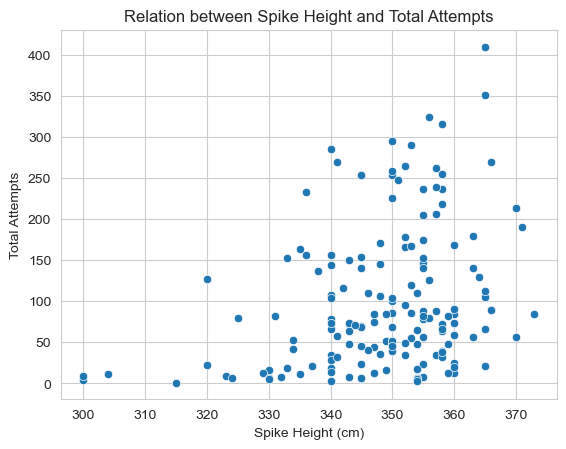

In [87]:
#Doing a scatter plot of spike height and the total attemps
#Seems a lot of player didn't have a lot of attempts, most probably ,bench players

sns.scatterplot(x='Spike',y='Total',data=b) 
plt.xlabel("Spike Height (cm)")
plt.ylabel("Total Attempts")
plt.title("Relation between Spike Height and Total Attempts")
plt.show()

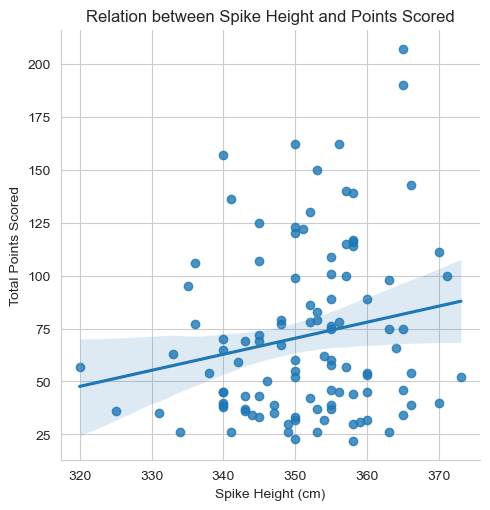

In [88]:
#Take out bench player (assigning as players with fewer than 50 attempts)
#Do linear regression plot between the spike height and points scored

b = b.loc[b['Total'] > 50]
sns.lmplot(x='Spike',y='Points',data=b,fit_reg=True) 
plt.xlabel("Spike Height (cm)")
plt.ylabel("Total Points Scored")
plt.title("Relation between Spike Height and Points Scored")
plt.show()

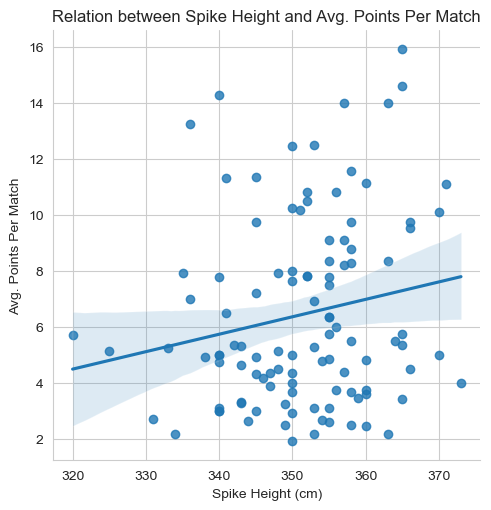

In [89]:
#Do linear regression plot between the spike height and avg. points score per match

sns.lmplot(x='Spike',y='AVG/Match',data=b,fit_reg=True)
plt.xlabel("Spike Height (cm)")
plt.ylabel("Avg. Points Per Match")
plt.title("Relation between Spike Height and Avg. Points Per Match")
plt.show()

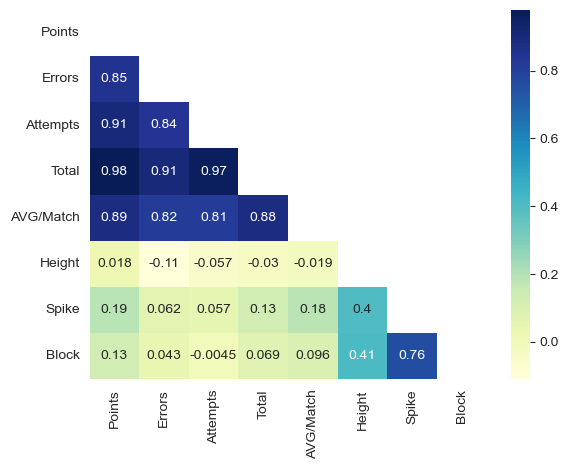

In [90]:
#Do a triangle correlation matrix
#Added this into my appendix slide (the last slide of my presentation powerpoint)

mask = np.triu(np.ones_like(b.corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(b.corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()